In [147]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Reading dataset

In [149]:
data=pd.read_csv('/content/drive/MyDrive/Natural Language Processing/Project - 3 - Predicting password strength/data.csv',error_bad_lines=False)

Skipping line 2810: expected 2 fields, saw 5
Skipping line 4641: expected 2 fields, saw 5
Skipping line 7171: expected 2 fields, saw 5
Skipping line 11220: expected 2 fields, saw 5
Skipping line 13809: expected 2 fields, saw 5
Skipping line 14132: expected 2 fields, saw 5
Skipping line 14293: expected 2 fields, saw 5
Skipping line 14865: expected 2 fields, saw 5
Skipping line 17419: expected 2 fields, saw 5
Skipping line 22801: expected 2 fields, saw 5
Skipping line 25001: expected 2 fields, saw 5
Skipping line 26603: expected 2 fields, saw 5
Skipping line 26742: expected 2 fields, saw 5
Skipping line 29702: expected 2 fields, saw 5
Skipping line 32767: expected 2 fields, saw 5
Skipping line 32878: expected 2 fields, saw 5
Skipping line 35643: expected 2 fields, saw 5
Skipping line 36550: expected 2 fields, saw 5
Skipping line 38732: expected 2 fields, saw 5
Skipping line 40567: expected 2 fields, saw 5
Skipping line 40576: expected 2 fields, saw 5
Skipping line 41864: expected 2 field

In [150]:
data.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [151]:
data['strength'].unique()

array([1, 2, 0])

In [152]:
data.isna().sum()

password    1
strength    0
dtype: int64

In [153]:
data[data['password'].isnull()]

,password,strength
367579,NaN,0


In [154]:
data.dropna(inplace=True)

In [155]:
data.isnull().sum()

password    0
strength    0
dtype: int64

<Axes: xlabel='strength', ylabel='count'>

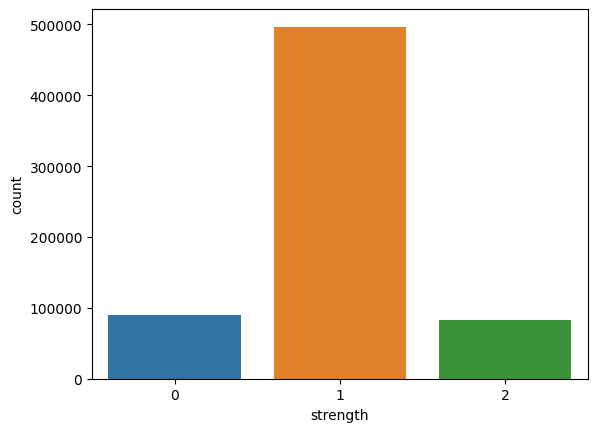

In [156]:
sns.countplot(x = data['strength'])

In [157]:
password_tuple=np.array(data)
password_tuple

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

### Shuffling randomly for robustness

In [158]:
import random
random.shuffle(password_tuple)
password_tuple

array([['kzde5577', 1],
       ['kino3434', 1],
       ['kino3434', 1],
       ...,
       ['haohung123', 1],
       ['webpwd001', 1],
       ['walid2009', 1]], dtype=object)

In [159]:
x=[labels[0] for labels in password_tuple]
y=[labels[1] for labels in password_tuple]
x

['kzde5577',
 'kino3434',
 'kino3434',
 'kino3434',
 'kino3434',
 'lamborghin1',
 'kino3434',
 'v1118714',
 'universe2908',
 'lamborghin1',
 'visi7k1yr',
 'megzy123',
 'visi7k1yr',
 'kzde5577',
 'jytifok873',
 'kzde5577',
 'u6c8vhow',
 'WUt9IZzE0OQ7PkNE',
 'lamborghin1',
 'v1118714',
 'AVYq1lDE4MgAZfNt',
 'universe2908',
 'u6c8vhow',
 'asv5o9yu',
 'jerusalem393',
 'jerusalem393',
 'intel1',
 'czuodhj972',
 'prisonbreak1',
 'prisonbreak1',
 'elyass15@ajilent-ci',
 'cigicigi123',
 'visi7k1yr',
 'faranumar91',
 'gaymaids1',
 'lsdlsd1',
 'faranumar91',
 'visi7k1yr',
 '612035180tok',
 'intel1',
 'megzy123',
 'memjan123',
 'idofo673',
 'sbl571017',
 'WUt9IZzE0OQ7PkNE',
 'czuodhj972',
 'kino3434',
 '6975038lp',
 'intel1',
 'olmaz.',
 'asgaliu11',
 '52558000aaa',
 'pHyqueDIyNQ8vmhb',
 'WUt9IZzE0OQ7PkNE',
 'go7kew7a2po',
 'kzde5577',
 'cigicigi123',
 'openup12',
 'juliel009',
 'WUt9IZzE0OQ7PkNE',
 'gaymaids1',
 'cigicigi123',
 'yk530mg8',
 'go7kew7a2po',
 'fahad123',
 'visi7k1yr',
 'go7kew7a2po

### Create a custom function to split input into characters of list

In [160]:
def word_divide_char(inputs):
    character=[]
    for i in inputs:
        character.append(i)
    return character

In [161]:
word_divide_char('kzde5577')

['k', 'z', 'd', 'e', '5', '5', '7', '7']

### Import TF-IDF vectorizer to convert String data into numerical data

In [162]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [163]:
vectorizer=TfidfVectorizer(tokenizer=word_divide_char)

### Applying TF-IDF vectorizer on data

In [164]:
X=vectorizer.fit_transform(x)

In [165]:
X.shape

(669639, 129)

In [166]:
vectorizer.get_feature_names_out()

array(['\x05', '\x0f', '\x10', '\x11', '\x16', '\x17', '\x19', '\x1b',
       '\x1c', '\x1e', ' ', '!', '"', '#', '$', '%', '&', '(', ')', '*',
       '+', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       '9', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`',
       'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm',
       'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z',
       '{', '|', '}', '~', '\x7f', '\x81', '\xa0', '¡', '¤', '¦', '§',
       '¨', '«', '°', '±', '²', '³', '´', 'µ', '¶', '·', '¹', 'º', '»',
       '¾', '¿', '×', 'ß', 'à', 'á', 'â', 'ä', 'å', 'æ', 'ç', 'è', 'é',
       'í', 'ï', 'ð', 'ñ', 'ò', 'ó', 'ô', 'õ', 'ö', '÷', 'ù', 'ú', 'û',
       'ü', 'ý', 'þ', 'ÿ', '—', '‚', '™'], dtype=object)

In [167]:
first_document_vector=X[0]
first_document_vector

<1x129 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [168]:
first_document_vector.T.todense()

matrix([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.56687827],
        [0.        ],
        [0.59197134],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

### Adding all results (TF-IDF results, feature names(characters)) into one dataframe

In [169]:
df=pd.DataFrame(first_document_vector.T.todense(),index=vectorizer.get_feature_names_out(),columns=['TF-IDF'])
df.sort_values(by=['TF-IDF'],ascending=False)

,TF-IDF
7,0.591971
5,0.566878
z,0.336178
k,0.291347
d,0.285351
...,...
?,0.000000
>,0.000000
=,0.000000
<,0.000000


### Splitting the data train and test sets

In [170]:
from sklearn.model_selection import train_test_split

In [171]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [172]:
X_train.shape

(535711, 129)

### Apply LogisticRegression function to classify the data

In [173]:
from sklearn.linear_model import LogisticRegression

In [174]:
clf=LogisticRegression(random_state=0,multi_class='multinomial')

In [175]:
clf.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial', random_state=0)

### doing prediction for specific custom data

In [176]:
dt=np.array(['%@123abcdTaAAzzpp'])
pred=vectorizer.transform(dt)
clf.predict(pred)

array([2])

### doing prediction on X-Test data

In [177]:
y_pred=clf.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 0])

### check accuracy of your model using confusion_matrix,accuracy_score

In [178]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [179]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[ 5400 12614    16]
 [ 3960 92696  2602]
 [   20  5146 11474]]
0.8181261573382713


#### creating classification report of the model

In [180]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.58      0.30      0.39     18030
           1       0.84      0.93      0.88     99258
           2       0.81      0.69      0.75     16640

    accuracy                           0.82    133928
   macro avg       0.74      0.64      0.67    133928
weighted avg       0.80      0.82      0.80    133928

